In [1]:
import os
os.chdir('..')
import graphs
import ep_utils
from time import perf_counter as pc
import networkx as nx
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import profile
import pstats
from importlib import reload

# Creating Bertha here because there's an error with creation sometimes

In [3]:

#sizes = list(set([int(2**i) for i in np.linspace(1,14,100)]))
sizes = 2**np.arange(5,14)
prog = tqdm(sizes,total = len(sizes))
berthas = {}

for i in prog:
    
    try:
        G = graphs.GenBertha(i)
        berthas[i] = G
    except:
        print(f"failed for size {i}")
    prog.update()

100%|█████████████████████████████████████████████| 9/9 [00:41<00:00,  4.58s/it]


In [4]:
def DuelOfMethods(bertha,verbose=False):
    """compares networkx's normal eigenvalue catching method to our method
    PARAMETERS:
        size (int): how big of graph you want to compare with
    RETURNS:
        our_time (float): how long our method took
        their_time (float): how long their method took
        accurate (bool): if we matched their spectrum
    """
    # normal method
    start = pc()
    their_spec = nx.adjacency_spectrum(bertha)
    end = pc()
    their_time = end-start
    
    # our method
    start = pc()
    our_spec = ep_utils.GetSpectrumFromLEPs(bertha,verbose=verbose)
    end = pc()
    our_time = end-start

    
    # check if our spectrums are the same
    accurate = Counter(np.round(np.array(their_spec),2)) == Counter(np.round(our_spec,2))
    
    return our_time, their_time, accurate
    

In [5]:
#size_list = list(set([int(2**i) for i in np.linspace(1,14,100)]))#[2**i for i in range(3,13)]

our_times = []
their_times = []
acc_count = []

progress_bar = tqdm(sizes,total=len(sizes))

for size in progress_bar:
    print(f"For Bertha of size: {size}")
    us, them, peter, acc = 0, 0, 0, 0
    iters = 2
    for i in range(iters):
        us_i, them_i, acc_i = DuelOfMethods(berthas[size])
        us, them, acc = us+us_i, them+them_i, acc+acc_i
    us, them, acc = us/iters, them/iters, acc/iters
    our_times.append(us)
    their_times.append(them)
    acc_count.append(acc)
    progress_bar.update()

  0%|                                                     | 0/9 [00:00<?, ?it/s]

For Bertha of size: 32


 11%|█████                                        | 1/9 [00:00<00:07,  1.08it/s]

For Bertha of size: 64
For Bertha of size: 128


 44%|████████████████████                         | 4/9 [00:01<00:01,  4.03it/s]

For Bertha of size: 256


 78%|███████████████████████████████████          | 7/9 [00:01<00:00,  4.76it/s]

For Bertha of size: 512


 89%|████████████████████████████████████████     | 8/9 [00:03<00:00,  1.91it/s]

For Bertha of size: 1024


10it [00:09,  1.50s/it]                                                         

For Bertha of size: 2048


11it [00:38,  7.16s/it]

For Bertha of size: 4096


12it [03:01, 38.29s/it]

For Bertha of size: 8192


100%|████████████████████████████████████████████| 9/9 [15:24<00:00, 102.72s/it]


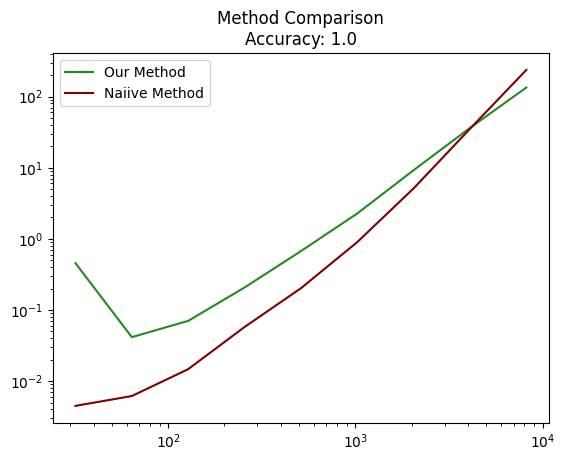

In [6]:
piece = 100
plt.loglog(list(sizes),our_times,'-',color='forestgreen',label="Our Method")
plt.loglog(list(sizes),their_times,'-',color='maroon',label='Naiive Method')
#plt.loglog(sizes,p(size_list),'-',color='midnightblue',label='Polynomial Regression (squared)')
#plt.loglog(sizes,p1(size_list),'-',color='chartreuse',label='Their Polynomial Regression (cubed)')

plt.title(f"Method Comparison\nAccuracy: {np.sum(acc_count)/len(acc_count)}")
plt.legend()
plt.savefig('Speed_comp.png')
plt.show()

In [ ]:
#bertha = graphs.GenBertha(1000)
#profile.run("ep_utils.GetSpectrumFromLEPs(bertha)")

In [ ]:
# do a dot bar graph for how fast we can go 

In [10]:
from collections import Counter
import numpy as np
from time import perf_counter as pc
from matplotlib import pyplot as plt